In [10]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
%available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
%warning off
format short e
% end of housekeeping

# Argentometric titrations

Imagine titrating 100 mL of 0.01 M KI with 0.1 M AgNO3.  

The equivalence point will be at 10.00 mL.  Same as all the other example titrations we have done (I pick the same conditions each time to emphasize that all titrations are really the same.  The specific reaction does not really matter).  Remember the equivalence point is just a stoichiometric addition of titrant to the initial amount of analyte.  The reaction is 1:1 so when we have added 0.01 mol/L * 0.1 L = 0.001 mol of titrant we have equivalence.

as derived in class anypoint in the tiration ([Ag+]) is given by solving the quadratic

a=1
b=IT-AgT
c=-Ksp


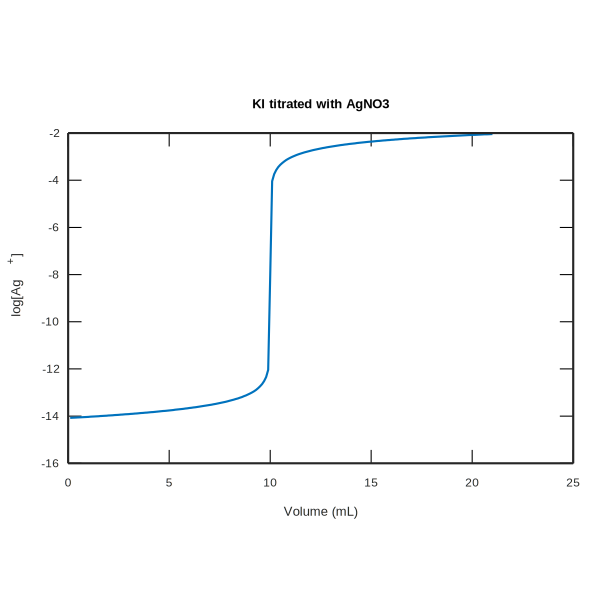

In [11]:

Ksp=8.3e-17; ITinitial=0.01; VT=0.100; Agstockconc=0.1;
volume=0:0.1:21; volume=volume./1000; %convert mL to L. 
volume(1)=0.0001; % need enough AgNO3 added for ppte to start otherwise Ksp is not true

AgT=(volume*Agstockconc)./(VT+volume);
IT=(ITinitial*VT)./(VT+volume); % correct for dilution

for i=1:length(AgT)
    a=1; b=IT(i)-AgT(i); c=-Ksp;
    t=roots([a b c]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    t=t(t>0); % just the positive real root
    logAg(i)=log10(t);
end


plot(volume*1000,logAg,'linewidth',2); xlabel('Volume (mL)'); ylabel('log[Ag^+]')
set(gca,'fontsize',11,'linewidth',2)
title('KI titrated with AgNO3')



# three special points

first point (zero added Ag, 0Ve) you assume a trace amount of Ag+ and that the ion product exceeds Ksp and precipitate forms

$[Ag^+]=\dfrac{K_{sp}}{I_T}$

at the mid point (Ve) we have added exactly as much Ag+ as I- we started with.  so we have  solution of AgI(s) with no excess Ag+ or I-.  So [Ag+]=[I-]

$[Ag^+]=\sqrt{K_{sp}}$

at 2Ve we have added exactly twice as much [Ag+] as we needed so half of it will be left over (The first half reacted) so the excess amount is equal to the $I_T$ we started with

$[Ag^+]=I_T$

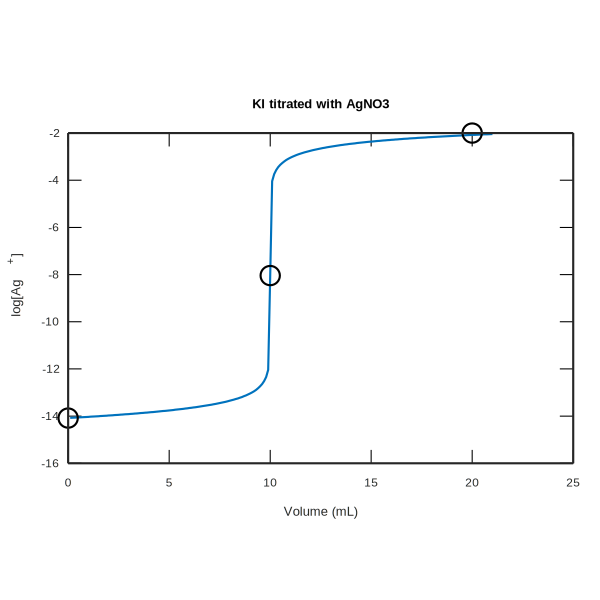

In [12]:

Ksp=8.3e-17; ITinitial=0.01; VT=0.100; Agstockconc=0.1;
volume=0:0.1:21; volume=volume./1000; %convert mL to L. 
volume(1)=0.0001; % need enough AgNO3 added for ppte to start otherwise Ksp is not true

AgT=(volume*Agstockconc)./(VT+volume);
IT=(ITinitial*VT)./(VT+volume); % correct for dilution

for i=1:length(AgT)
    a=1; b=IT(i)-AgT(i); c=-Ksp;
    t=roots([a b c]); %finds the roots
    t=t(imag(t)==0); %sets any imaginary roots to zero
    t=t(t>0); % just the positive real root
    logAg(i)=log10(t);
end


plot(volume*1000,logAg,'linewidth',2); xlabel('Volume (mL)'); ylabel('log[Ag^+]')
set(gca,'fontsize',11,'linewidth',2)
title('KI titrated with AgNO3')

hold on
plot([0 10 20],[log10(Ksp/ITinitial) log10(sqrt(Ksp)) log10(ITinitial)],'ko')
